# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create a list to store the json response for each city
responses = []

# Create base url
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

city_count = 0
for city in cities:
    url = base_url + f"{city}&units=metric&appid={weather_api_key}"
    city_data = requests.get(url).json()
    if city_data['cod'] == '404':
        print('City not found. Skipping...')
    else:
        responses.append(city_data)
        city_count += 1
        print(f"Processing record {city_count} | {city_data['name']}")

Processing record 1 | Brae
Processing record 2 | Busselton
Processing record 3 | Yellowknife
Processing record 4 | Dikson
Processing record 5 | Morales
City not found. Skipping...
Processing record 6 | Albany
City not found. Skipping...
Processing record 7 | Husavik
Processing record 8 | Cape Town
Processing record 9 | Wanning
Processing record 10 | Knysna
City not found. Skipping...
Processing record 11 | Hong Kong
Processing record 12 | Hermanus
Processing record 13 | Vaini
Processing record 14 | Bredasdorp
Processing record 15 | Montepuez
Processing record 16 | Tezu
Processing record 17 | Derbent
Processing record 18 | Mataura
Processing record 19 | Salalah
Processing record 20 | Atuona
Processing record 21 | Souillac
Processing record 22 | Thompson
Processing record 23 | New Norfolk
Processing record 24 | Punta Arenas
Processing record 25 | Geraldton
Processing record 26 | Grand Gaube
Processing record 27 | Ponta do Sol
Processing record 28 | Zambezi
Processing record 29 | Cândido 

Processing record 236 | Vila Velha
City not found. Skipping...
Processing record 237 | Wattegama
Processing record 238 | Fort-Shevchenko
City not found. Skipping...
Processing record 239 | Monrovia
Processing record 240 | Puerto Baquerizo Moreno
Processing record 241 | Shorkot
Processing record 242 | Ancud
Processing record 243 | Tiksi
Processing record 244 | Okato
Processing record 245 | Boa Vista
Processing record 246 | Fallon
Processing record 247 | Pio XII
Processing record 248 | Departamento de Maldonado
Processing record 249 | Assiut
Processing record 250 | Debre Birhan
Processing record 251 | Rairangpur
Processing record 252 | Bambous Virieux
Processing record 253 | San Patricio
Processing record 254 | Ayan
Processing record 255 | Zaysan
City not found. Skipping...
Processing record 256 | Arman'
Processing record 257 | Tucumcari
Processing record 258 | Mount Isa
Processing record 259 | Jijiga
City not found. Skipping...
Processing record 260 | Iskateley
Processing record 261 | B

Processing record 460 | Bibiani
Processing record 461 | Sandwick
City not found. Skipping...
Processing record 462 | Araouane
Processing record 463 | Brownsville
Processing record 464 | Viekšniai
Processing record 465 | Sittwe
Processing record 466 | Port Hedland
Processing record 467 | Port-Gentil
Processing record 468 | Novy Urengoy
Processing record 469 | Sauce
Processing record 470 | Biak
Processing record 471 | Pontianak
Processing record 472 | Akşehir
Processing record 473 | Atar
Processing record 474 | Tarakan
Processing record 475 | Dhidhdhoo
Processing record 476 | Taoudenni
Processing record 477 | Aleysk
Processing record 478 | Launceston
Processing record 479 | Opotiki
Processing record 480 | Niigata
Processing record 481 | Anamur
Processing record 482 | Roebourne
Processing record 483 | Meulaboh
Processing record 484 | Valdivia
Processing record 485 | Qaqortoq
Processing record 486 | Sault Ste. Marie
Processing record 487 | Kamiiso
Processing record 488 | Luang Prabang
Proc

In [4]:
responses[0]

{'coord': {'lon': -1.353, 'lat': 60.3964},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 12.95,
  'feels_like': 12.83,
  'temp_min': 12.95,
  'temp_max': 12.95,
  'pressure': 1015,
  'humidity': 97,
  'sea_level': 1015,
  'grnd_level': 1013},
 'visibility': 10000,
 'wind': {'speed': 5.87, 'deg': 192, 'gust': 12.11},
 'clouds': {'all': 100},
 'dt': 1633637094,
 'sys': {'type': 1,
  'id': 1438,
  'country': 'GB',
  'sunrise': 1633587949,
  'sunset': 1633627220},
 'timezone': 3600,
 'id': 2654970,
 'name': 'Brae',
 'cod': 200}

## Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create lists to store values
found_cities = []
lats = []
lngs = []
max_temps = []
humidities = []
clouds = []
wind_speeds = []
countries = []
dates = []


for i in range(city_count):
    response = responses[i]
    found_cities.append(response['name'])
    lats.append(response['coord']['lat'])
    lngs.append(response['coord']['lon'])
    max_temps.append(response['main']['temp_max'])
    humidities.append(response['main']['humidity'])
    clouds.append(response['clouds']['all'])
    wind_speeds.append(response['wind']['speed'])
    countries.append(response['sys']['country'])
    dates.append(response['dt'])
    
city_weather_data = pd.DataFrame({'City': found_cities,
                                  'Lat': lats,
                                  'Lng': lngs,
                                  'Max Temp': max_temps,
                                  'Humidity': humidities,
                                  'Cloudiness': clouds,
                                  'Wind Speed': wind_speeds,
                                  'Country': countries,
                                  'Date': dates})
city_weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Brae,60.3964,-1.3530,12.95,97,100,5.87,GB,1633637094
1,Busselton,-33.6500,115.3333,10.60,72,52,3.35,AU,1633637094
2,Yellowknife,62.4560,-114.3525,4.12,99,100,3.58,CA,1633637095
3,Dikson,73.5069,80.5464,1.85,87,100,9.26,RU,1633637095
4,Morales,2.7570,-76.6172,20.78,84,82,1.29,CO,1633637096


In [6]:
city_weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,5.890000e+02
mean,19.006067,18.119938,17.803939,70.402377,56.337861,3.392071,1.633637e+09
std,33.226974,89.967831,10.640482,21.450133,38.938591,2.406868,1.579389e+02
min,-54.800000,-175.200000,-19.390000,7.000000,0.000000,0.000000,1.633636e+09
25%,-7.191100,-60.700000,10.510000,60.000000,17.000000,1.760000,1.633637e+09
50%,20.931000,20.225100,20.680000,76.000000,65.000000,2.840000,1.633637e+09
75%,47.666600,97.453100,25.590000,87.000000,98.000000,4.570000,1.633637e+09
max,78.218600,179.316700,39.380000,100.000000,100.000000,14.720000,1.633637e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

Based on the summary table above, there are no cities where humidity > 100%!

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

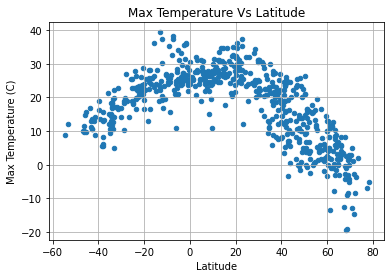

In [7]:
# Set x and y values
city_weather_data.plot('Lat', 'Max Temp', kind='scatter', xlabel='Latitude', ylabel='Max Temperature (C)', title='Max Temperature Vs Latitude', grid=True)
plt.show()

## Latitude vs. Humidity Plot

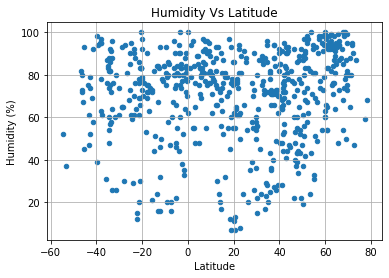

In [8]:
city_weather_data.plot('Lat', 'Humidity', kind='scatter', xlabel='Latitude', ylabel='Humidity (%)', title='Humidity Vs Latitude', grid=True)
plt.show()

## Latitude vs. Cloudiness Plot

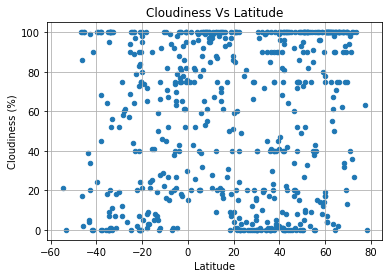

In [9]:
city_weather_data.plot('Lat', 'Cloudiness', kind='scatter', xlabel='Latitude', ylabel='Cloudiness (%)', title='Cloudiness Vs Latitude', grid=True)
plt.show()

## Latitude vs. Wind Speed Plot

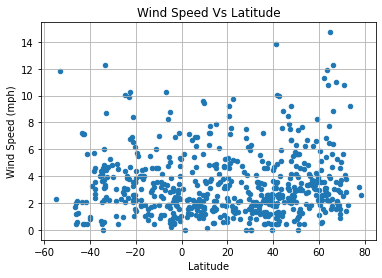

In [10]:
city_weather_data.plot('Lat', 'Wind Speed', kind='scatter', xlabel='Latitude', ylabel='Wind Speed (mph)', title='Wind Speed Vs Latitude', grid=True)
plt.show()

## Linear Regression

In [12]:
# split data into northern and southern hemispheres
northern_hem_cities = city_weather_data.loc[(city_weather_data['Lat'] > 0)]
southern_hem_cities = city_weather_data.loc[(city_weather_data['Lat'] < 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Brae,60.3964,-1.3530,12.95,97,100,5.87,GB,1633637094
2,Yellowknife,62.4560,-114.3525,4.12,99,100,3.58,CA,1633637095
3,Dikson,73.5069,80.5464,1.85,87,100,9.26,RU,1633637095
4,Morales,2.7570,-76.6172,20.78,84,82,1.29,CO,1633637096
5,Albany,42.6001,-73.9662,24.79,72,0,0.69,US,1633636706


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

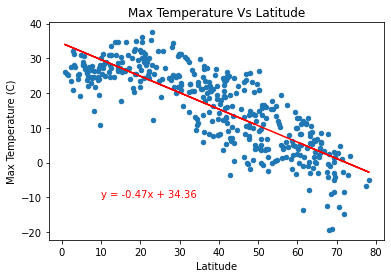

In [28]:
xvalues = northern_hem_cities['Lat']
yvalues = northern_hem_cities['Max Temp']
nt_slope, nt_intercept, nt_r, nt_p, nt_std_err = linregress(xvalues, yvalues)
nt_fit = nt_slope*xvalues + nt_intercept
fit_eq = f'y = {round(nt_slope, 2)}x + {round(nt_intercept, 2)}'

northern_hem_cities.plot('Lat', 'Max Temp', kind='scatter', xlabel='Latitude', ylabel='Max Temperature (C)', title='Max Temperature Vs Latitude')
plt.plot(xvalues, nt_fit, "-", color='r')
plt.annotate(fit_eq, (10,-10), color='r')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

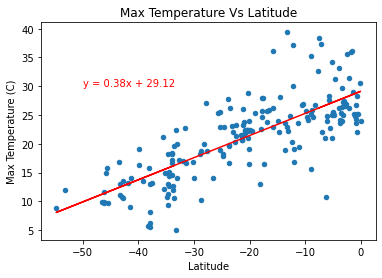

In [29]:
xvalues = southern_hem_cities['Lat']
yvalues = southern_hem_cities['Max Temp']
st_slope, st_intercept, st_r, st_p, st_std_err = linregress(xvalues, yvalues)
st_fit = st_slope*xvalues + st_intercept
fit_eq = f'y = {round(st_slope, 2)}x + {round(st_intercept, 2)}'

southern_hem_cities.plot('Lat', 'Max Temp', kind='scatter', xlabel='Latitude', ylabel='Max Temperature (C)', title='Max Temperature Vs Latitude')
plt.plot(xvalues, st_fit, "-", color='r')
plt.annotate(fit_eq, (-50,30), color='r')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

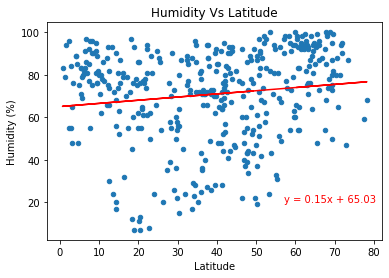

In [30]:
xvalues = northern_hem_cities['Lat']
yvalues = northern_hem_cities['Humidity']
nt_slope, nt_intercept, nt_r, nt_p, nt_std_err = linregress(xvalues, yvalues)
nt_fit = nt_slope*xvalues + nt_intercept
fit_eq = f'y = {round(nt_slope, 2)}x + {round(nt_intercept, 2)}'

northern_hem_cities.plot('Lat', 'Humidity', kind='scatter', xlabel='Latitude', ylabel='Humidity (%)', title='Humidity Vs Latitude')
plt.plot(xvalues, nt_fit, "-", color='r')
plt.annotate(fit_eq, (57,20), color='r')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

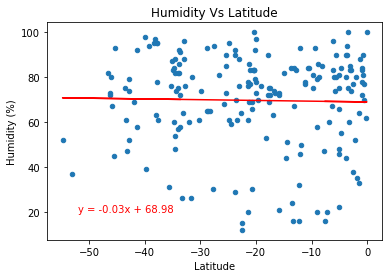

In [40]:
xvalues = southern_hem_cities['Lat']
yvalues = southern_hem_cities['Humidity']
st_slope, st_intercept, st_r, st_p, st_std_err = linregress(xvalues, yvalues)
st_fit = st_slope*xvalues + st_intercept
fit_eq = f'y = {round(st_slope, 2)}x + {round(st_intercept, 2)}'

southern_hem_cities.plot('Lat', 'Humidity', kind='scatter', xlabel='Latitude', ylabel='Humidity (%)', title='Humidity Vs Latitude')
plt.plot(xvalues, st_fit, "-", color='r')
plt.annotate(fit_eq, (-52,20), color='r')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

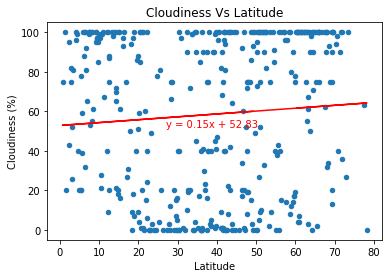

In [32]:
xvalues = northern_hem_cities['Lat']
yvalues = northern_hem_cities['Cloudiness']
nt_slope, nt_intercept, nt_r, nt_p, nt_std_err = linregress(xvalues, yvalues)
nt_fit = nt_slope*xvalues + nt_intercept
fit_eq = f'y = {round(nt_slope, 2)}x + {round(nt_intercept, 2)}'

northern_hem_cities.plot('Lat', 'Cloudiness', kind='scatter', xlabel='Latitude', ylabel='Cloudiness (%)', title='Cloudiness Vs Latitude')
plt.plot(xvalues, nt_fit, "-", color='r')
plt.annotate(fit_eq, (27,52), color='r')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

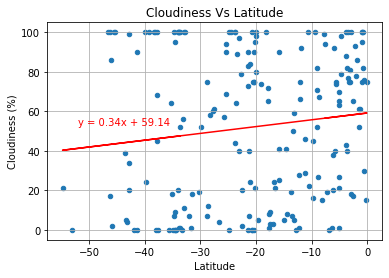

In [43]:
xvalues = southern_hem_cities['Lat']
yvalues = southern_hem_cities['Cloudiness']
st_slope, st_intercept, st_r, st_p, st_std_err = linregress(xvalues, yvalues)
st_fit = st_slope*xvalues + st_intercept
fit_eq = f'y = {round(st_slope, 2)}x + {round(st_intercept, 2)}'

southern_hem_cities.plot('Lat', 'Cloudiness', kind='scatter', xlabel='Latitude', ylabel='Cloudiness (%)', title='Cloudiness Vs Latitude', grid=True)
plt.plot(xvalues, st_fit, "-", color='r')
plt.annotate(fit_eq, (-52,53), color='r')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

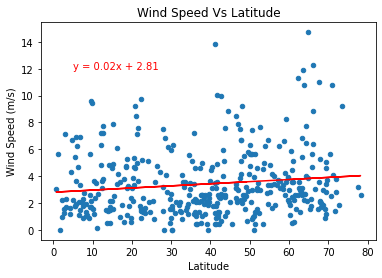

In [34]:
xvalues = northern_hem_cities['Lat']
yvalues = northern_hem_cities['Wind Speed']
nt_slope, nt_intercept, nt_r, nt_p, nt_std_err = linregress(xvalues, yvalues)
nt_fit = nt_slope*xvalues + nt_intercept
fit_eq = f'y = {round(nt_slope, 2)}x + {round(nt_intercept, 2)}'

northern_hem_cities.plot('Lat', 'Wind Speed', kind='scatter', xlabel='Latitude', ylabel='Wind Speed (m/s)', title='Wind Speed Vs Latitude')
plt.plot(xvalues, nt_fit, "-", color='r')
plt.annotate(fit_eq, (5,12), color='r')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

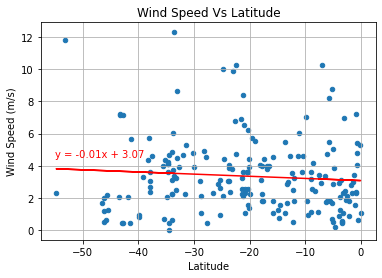

In [48]:
xvalues = southern_hem_cities['Lat']
yvalues = southern_hem_cities['Wind Speed']
st_slope, st_intercept, st_r, st_p, st_std_err = linregress(xvalues, yvalues)
st_fit = st_slope*xvalues + st_intercept
fit_eq = f'y = {round(st_slope, 2)}x + {round(st_intercept, 2)}'

southern_hem_cities.plot('Lat', 'Wind Speed', kind='scatter', xlabel='Latitude', ylabel='Wind Speed (m/s)', title='Wind Speed Vs Latitude', grid=True)
plt.plot(xvalues, st_fit, "-", color='r')
plt.annotate(fit_eq, (-55,4.5), color='r')
plt.show()